# Linear Regression -  Introduction

This notebook provides an example of building and validating a linear regression model on the car dataset. Our target variable which we will try to predict will be the car price.
Steps:
 - Describe and understand the data
 - Statistical testing
 - Some visualisation 
 - Check for multicolineary and remove some features if needed
 - Build an OLS model using statsmodel package
 - Get the summary of the model and interpret
 - Model diagnostics

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.api import qqplot 
from scipy.stats import shapiro,ttest_ind
from statsmodels.stats.diagnostic import het_breuschpagan,linear_rainbow  

# Data

In [39]:
data = pd.read_csv('Car_dataset.csv')

In [40]:
# we have 193 rows(different cars), 23 different features including the target(price)
data.shape

(193, 23)

In [41]:
# the first 5 rows of the data
data.head()

,make,fuel_type,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,alfa-romero,gas,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,alfa-romero,gas,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,alfa-romero,gas,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,audi,gas,four,sedan,fwd,front,99.8,176.6,66.2,54.3,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,audi,gas,four,sedan,4wd,front,99.4,176.6,66.4,54.3,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               193 non-null    object 
 1   fuel_type          193 non-null    object 
 2   num_of_doors       193 non-null    object 
 3   body_style         193 non-null    object 
 4   drive_wheels       193 non-null    object 
 5   engine_location    193 non-null    object 
 6   wheel_base         193 non-null    float64
 7   length             193 non-null    float64
 8   width              193 non-null    float64
 9   height             193 non-null    float64
 10  curb_weight        193 non-null    int64  
 11  engine_type        193 non-null    object 
 12  num_of_cylinders   193 non-null    object 
 13  engine_size        193 non-null    int64  
 14  fuel_system        193 non-null    object 
 15  bore               193 non-null    float64
 16  stroke             193 non

In [43]:
# see whether there are any missing values 
data.isna().sum()

make                 0
fuel_type            0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [44]:
data.describe()

,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,98.923834,174.326425,65.893782,53.869948,2561.507772,128.124352,3.330622,3.248860,10.143627,103.481865,5099.740933,25.326425,30.787565,13285.025907
std,6.152409,12.478593,2.137795,2.394770,526.700026,41.590452,0.272385,0.315421,3.977491,37.960107,468.694369,6.387828,6.816910,8089.082886
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,98.000000,3.150000,3.110000,8.500000,70.000000,4800.000000,19.000000,25.000000,7738.000000
50%,97.000000,173.200000,65.400000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5100.000000,25.000000,30.000000,10245.000000
75%,102.400000,184.600000,66.900000,55.700000,2952.000000,146.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16515.000000
max,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [45]:
#checking whether we have a columns with no variance which is not really useful
data.columns[data.nunique()==1]

Index([], dtype='object')

In [46]:
# separating numeric and categorical columns
data_num = data.select_dtypes(exclude=["object"])
data_obj = data.select_dtypes(include=["object"])

In [47]:
print(data_num.shape)
print(data_obj.shape)

(193, 14)
(193, 9)


In [48]:
print(data_num.columns)
print(data_obj.columns)

Index(['wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size',
       'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm',
       'city_mpg', 'highway_mpg', 'price'],
      dtype='object')
Index(['make', 'fuel_type', 'num_of_doors', 'body_style', 'drive_wheels',
       'engine_location', 'engine_type', 'num_of_cylinders', 'fuel_system'],
      dtype='object')


In [49]:
#seeing how many categories each of that has
data_obj.nunique()

make                21
fuel_type            2
num_of_doors         2
body_style           5
drive_wheels         3
engine_location      2
engine_type          5
num_of_cylinders     6
fuel_system          7
dtype: int64

In [50]:
data_obj.make.value_counts()

toyota           32
nissan           18
mitsubishi       13
honda            13
volkswagen       12
subaru           12
mazda            12
volvo            11
peugot           11
dodge             8
bmw               8
mercedes-benz     8
plymouth          7
saab              6
audi              6
porsche           4
alfa-romero       3
jaguar            3
chevrolet         3
isuzu             2
mercury           1
Name: make, dtype: int64

In [51]:
rare_make = data_obj.make.value_counts().tail(10).index.tolist()

In [52]:
rare_make

['mercedes-benz',
 'plymouth',
 'saab',
 'audi',
 'porsche',
 'alfa-romero',
 'jaguar',
 'chevrolet',
 'isuzu',
 'mercury']

In [53]:
data_obj['make'] = np.where(data_obj['make'].isin(rare_make),'other',data_obj['make'])

<ipython-input-53-8c10bfb49d69>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_obj['make'] = np.where(data_obj['make'].isin(rare_make),'other',data_obj['make'])


# Testing

In [54]:
print("2-door:",data.price[data.num_of_doors=="two"].mean())
print("4-door:",data.price[data.num_of_doors=="four"].mean())

2-door: 12844.246913580248
4-door: 13603.80357142857


In [55]:
ttest_ind(data.price[data.num_of_doors=="two"],
               data.price[data.num_of_doors=="four"])

Ttest_indResult(statistic=-0.6427899222652471, pvalue=0.521131300440071)

###### With this t-test we tested whether the mean price for 2 and 4 door cars are significantly different(H0 assumes equal means). The p-value for the test is 0.52, so we conclude that we have no enough evidence to reject H0 and the average price is not significantly different for two and four door cars.

# Visualization

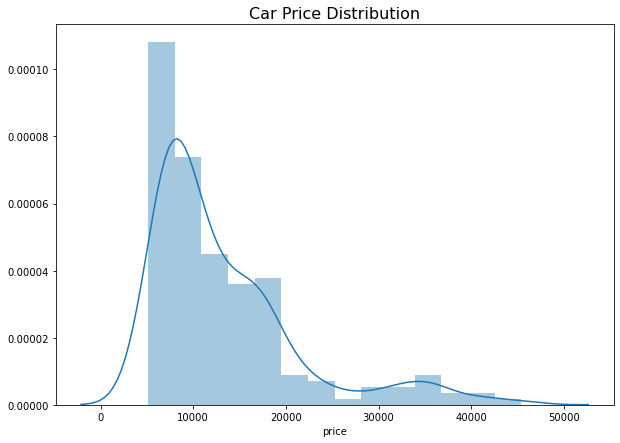

In [56]:
# see the target distribution
plt.figure(figsize = (10,7))
sns.distplot(data.price)
plt.title("Car Price Distribution",fontsize = 16) 
plt.show()

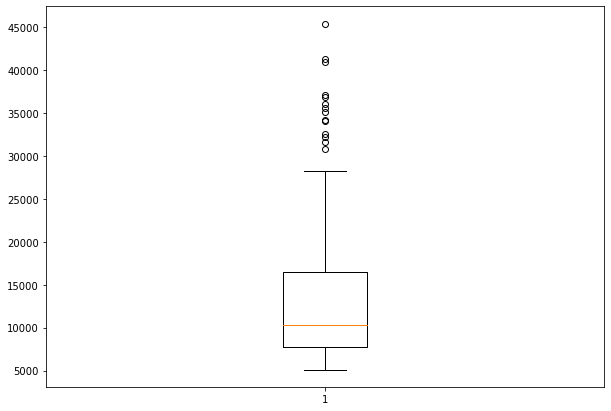

In [57]:
# observe outliers of target
plt.figure(figsize = (10,7))
plt.boxplot(data.price)
plt.show()

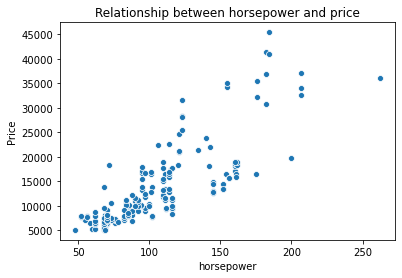

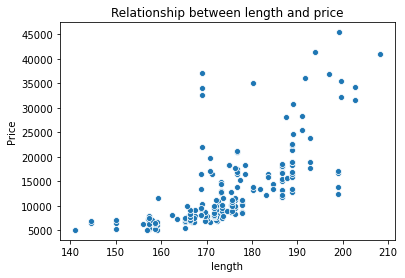

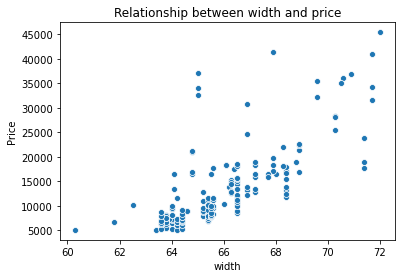

In [58]:
# scatter plot for relationship between target and some numeric variables
for i in ['horsepower','length','width']:
    sns.scatterplot(data[i],data['price'])
    plt.xlabel(i)
    plt.ylabel("Price")
    plt.title(f"Relationship between {i} and price")
    plt.show()

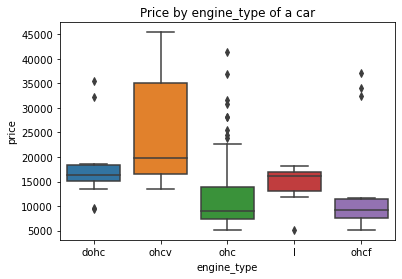

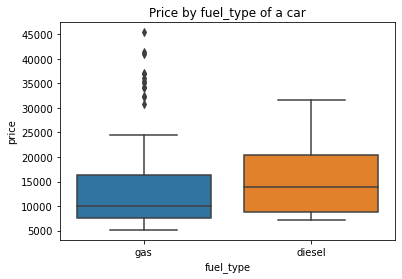

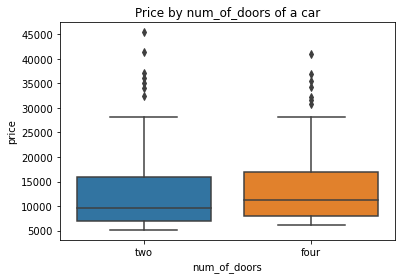

In [59]:
# boxplot for relationship between target and some object variables
for i in ['engine_type','fuel_type','num_of_doors']:
    sns.boxplot(x=data[i],y=data['price'])
    plt.title(f"Price by {i} of a car")
    plt.show()

# Multicolinearity

In [60]:
data_num.corr()

,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
wheel_base,1.000000,0.879307,0.818465,0.591239,0.782173,0.568375,0.495957,0.174225,0.252234,0.377040,-0.350823,-0.504499,-0.571771,0.584951
length,0.879307,1.000000,0.857368,0.491050,0.882694,0.686998,0.606373,0.121888,0.156061,0.589650,-0.276144,-0.702143,-0.731264,0.695928
width,0.818465,0.857368,1.000000,0.310640,0.867640,0.739903,0.541633,0.188733,0.188631,0.621532,-0.247612,-0.657153,-0.702009,0.754649
height,0.591239,0.491050,0.310640,1.000000,0.305837,0.026906,0.182445,-0.054338,0.253934,-0.081730,-0.257334,-0.111166,-0.159850,0.136234
curb_weight,0.782173,0.882694,0.867640,0.305837,1.000000,0.857188,0.645070,0.175349,0.161030,0.762154,-0.278528,-0.777763,-0.818104,0.835368
engine_size,0.568375,0.686998,0.739903,0.026906,0.857188,1.000000,0.581854,0.214518,0.025257,0.845325,-0.217769,-0.716378,-0.737531,0.888778
bore,0.495957,0.606373,0.541633,0.182445,0.645070,0.581854,1.000000,-0.065038,-0.004172,0.572972,-0.273766,-0.601369,-0.608804,0.546295
stroke,0.174225,0.121888,0.188733,-0.054338,0.175349,0.214518,-0.065038,1.000000,0.199600,0.102913,-0.068420,-0.031248,-0.040274,0.096007
compression_ratio,0.252234,0.156061,0.188631,0.253934,0.161030,0.025257,-0.004172,0.199600,1.000000,-0.203818,-0.439741,0.314648,0.249669,0.074483
horsepower,0.377040,0.589650,0.621532,-0.081730,0.762154,0.845325,0.572972,0.102913,-0.203818,1.000000,0.101383,-0.833615,-0.812078,0.812453


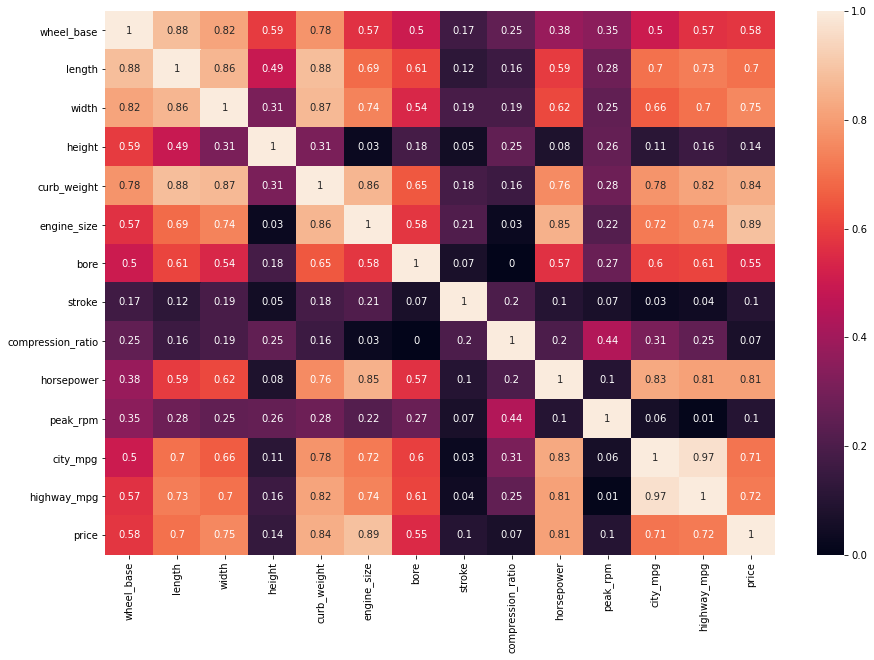

In [61]:
plt.figure(figsize = (15,10))
sns.heatmap(data_num.corr().abs().round(2), annot=True)
plt.show()

In [62]:
cols_to_remove = ['wheel_base','length','curb_weight','horsepower','city_mpg']

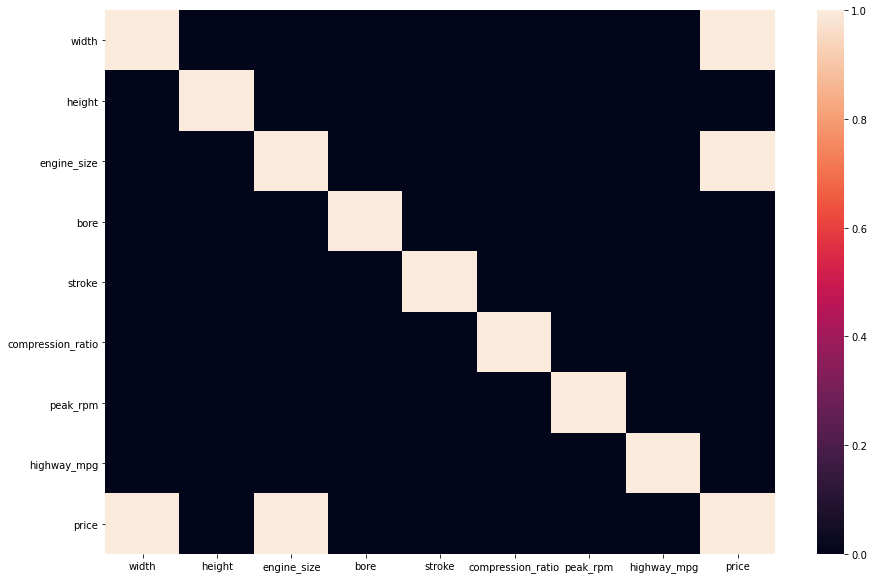

In [63]:
#let's see whether we are left with any correlations above or equal to 75% in absolute values
plt.figure(figsize = (15,10))
sns.heatmap(data_num.drop(cols_to_remove,axis=1).corr().abs()>=0.75)
plt.show()

In [64]:
data_num = data_num.drop(cols_to_remove,axis=1)

# OLS Model


In [65]:
# dummies
data_dummies = pd.get_dummies(data_obj,drop_first = True)

In [66]:
data_dummies.shape

(193, 35)

In [67]:
data_dummies.head()

,make_dodge,make_honda,make_mazda,make_mitsubishi,make_nissan,make_other,make_peugot,make_subaru,make_toyota,make_volkswagen,...,num_of_cylinders_four,num_of_cylinders_six,num_of_cylinders_three,num_of_cylinders_twelve,fuel_system_2bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi,fuel_system_spfi
0,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [68]:
# merging all variables together
data_model = data_num.join(data_dummies,how='left')

In [69]:
variables = data_model.columns.tolist()

In [70]:
# removing the target and keeping only the independent variables in the list
variables.remove('price')

In [71]:
formula = "+".join(variables)
formula = 'price~'+formula
formula

'price~width+height+engine_size+bore+stroke+compression_ratio+peak_rpm+highway_mpg+make_dodge+make_honda+make_mazda+make_mitsubishi+make_nissan+make_other+make_peugot+make_subaru+make_toyota+make_volkswagen+make_volvo+fuel_type_gas+num_of_doors_two+body_style_hardtop+body_style_hatchback+body_style_sedan+body_style_wagon+drive_wheels_fwd+drive_wheels_rwd+engine_location_rear+engine_type_l+engine_type_ohc+engine_type_ohcf+engine_type_ohcv+num_of_cylinders_five+num_of_cylinders_four+num_of_cylinders_six+num_of_cylinders_three+num_of_cylinders_twelve+fuel_system_2bbl+fuel_system_idi+fuel_system_mfi+fuel_system_mpfi+fuel_system_spdi+fuel_system_spfi'

In [72]:
# build the model 
model_ols=ols(formula=formula, data = data_model)

In [73]:
#see the summary of the results 
results = model_ols.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     71.58
Date:                Sat, 12 Sep 2020   Prob (F-statistic):           4.20e-80
Time:                        13:59:03   Log-Likelihood:                -1721.7
No. Observations:                 193   AIC:                             3525.
Df Residuals:                     152   BIC:                             3659.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -2.722e+04   1.06e+04     -2.561      0.011   -4.82e+04   -6220.634
width                    1280.1821    189.841      6.743      0.000     905.115    1655.249
height                     42.0143    123.545      0.340      0.734    -202.073     286.102
engine_size               114.4091     19.280      5.934      0.000      76.318     152.500
bore                    -2817.6281   1647.909     -1.710      0.089   -6073.392     438.136
stroke                  -2574.5837    948.974     -2.713      0.007   -4449.466    -699.701
compression_ratio       -1303.7665    437.657     -2.979      0.003   -2168.443    -439.090
peak_rpm                    1.3552      0.602      2.252      0.026       0.166       2.544
highway_mpg               -20.2222     61.285     -0.330      0.742    -141.304     100.859
make_dodge              -7168.5284   1672.395     -4.286      0.000   -1.05e+04   -3864.387
make_honda              -5806.2025   2178.434     -2.665      0.009   -1.01e+04   -1502.284
make_mazda              -7692.2513   1502.041     -5.121      0.000   -1.07e+04   -4724.677
make_mitsubishi         -8320.7998   1708.986     -4.869      0.000   -1.17e+04   -4944.366
make_nissan             -7004.0401   1489.787     -4.701      0.000   -9947.403   -4060.677
make_other              -6020.3650   1453.599     -4.142      0.000   -8892.231   -3148.499
make_peugot             -8273.2459   2082.096     -3.974      0.000   -1.24e+04   -4159.661
make_subaru             -1.009e+04   1664.387     -6.064      0.000   -1.34e+04   -6805.263
make_toyota             -8088.3371   1374.808     -5.883      0.000   -1.08e+04   -5372.138
make_volkswagen         -7681.3514   1543.844     -4.975      0.000   -1.07e+04   -4631.188
make_volvo              -6613.4482   1293.685     -5.112      0.000   -9169.374   -4057.522
fuel_type_gas           -2.412e+04   5340.862     -4.516      0.000   -3.47e+04   -1.36e+04
num_of_doors_two         -282.2441    525.088     -0.538      0.592   -1319.658     755.170
body_style_hardtop      -2688.9624   1214.730     -2.214      0.028   -5088.897    -289.028
body_style_hatchback    -2913.2781   1068.893     -2.726      0.007   -5025.083    -801.474
body_style_sedan        -2736.9679   1150.062     -2.380      0.019   -5009.138    -464.798
body_style_wagon        -3120.2695   1317.588     -2.368      0.019   -5723.421    -517.118
drive_wheels_fwd        -1451.5719    937.694     -1.548      0.124   -3304.169     401.025
drive_wheels_rwd         -214.7892   1157.294     -0.186      0.853   -2501.248    2071.669
engine_location_rear      1.13e+04   1614.261      7.000      0.000    8110.440    1.45e+04
engine_type_l           -3107.2165   1469.162     -2.115      0.036   -6009.831    -204.602
engine_type_ohc          -332.3007   1018.180  

### Interpretation of the results of Linear Regression
R-squared and F-statistics: As Prob (F-statistic) shows our model is statistically significant at 5%(even 1%) significance level, so there is at least one estimated coefficient (besides intercept) that is not null. R-squared is quite big number and it shows that 95% of variance in car prices is explained by the variables included in the model.

Adj. R-squared: As summary shows it's 93.6%. It is close to R-squared,but anyway there is some difference which means that there are not important variables included in the model.

Statistically significant variables: 
  - engine_size has a p-value equal to zero which means that it is statsitically significant, and as the coefficient is positive it's effect on price is positive.
  - bore has a p-value equal to 0.089 which means it is not statistically significant at 95% conidence interval, but is significant at 90%. So if 90% is acceptable we can say that it has a negative effect on price.
  - num_of_doors_two has a big p-value, which means it is not a statistically significant variable and no need to interpret it's effect. 
  
Coefficients (continous variable): 
 - For each unit increase in width we will experience on average about 1280 dollars increase in mean price of a car. Please not that we interpret a statistically significant variable.
 
Coefficients (categorical variable)
- the reference category for fuel type is diesel. So if a car fueltype is gas rather than diesel then on average 24120 dollars increase is expected in mean price of a car. Please not that we interpret a statistically significant variable.

Final Model

Please note that if the variable is in the model and you have no possibility or you do not want to remove it it should be in the final model formulation even if it is not statistically significant

Price = -27220 + 1280.1821 width + 42.0143 heigth + 114.4091 engine_size ............

# Model diagnostics

In [74]:
#residuals of the model
residuals=results.resid
residuals.head(10)

0   -2937.421955
1      67.578045
2    2793.860977
3    2776.110700
4    -109.881783
5     314.919468
6   -4145.490491
7   -2552.188899
8    2052.229888
9   -2474.717075
dtype: float64

In [75]:
pred_values=results.predict()

### Linearity and Equal variance

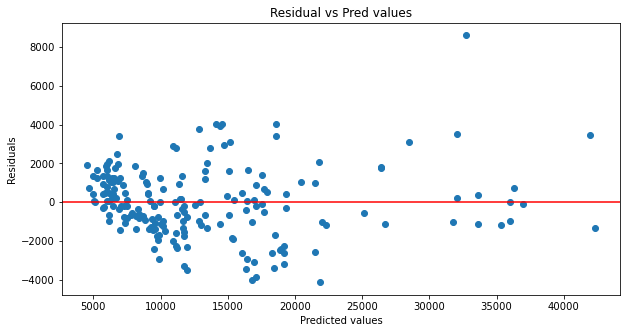

In [76]:
#lets plot predicted values vs residuals to see whether there is any pattern or no
plt.figure(figsize=(10,5))
plt.scatter(pred_values,residuals)
plt.axhline(y=0, c="red")
plt.title("Residual vs Pred values")
plt.ylabel("Residuals")
plt.xlabel("Predicted values")
plt.show()

The residuals vs fitted values plot pattern is random, however we can see an increasing variance as the values increase.
Hence, the visual evidence in this case is not enough to make conclusions.

In [77]:
#Breusch-Pagan test for homoscedasticity
#The null hypothesis assumes homoskedasticity
bnames = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
breush = het_breuschpagan(residuals, results.model.exog)
print(list(zip(bnames, breush)))

[('Lagrange multiplier statistic', 44.96107267581521), ('p-value', 0.38972523502335366), ('f-value', 1.1541023652107085), ('f p-value', 0.26588745151044174)]


We have a big p-value, so we have not enough evidence to reject the homoscedasticity assumtion.
Homoscedasticity assumption is held.

In [78]:
#Rainbow test for linearity 
#The null hypothesis assumes linearity
rnames=["fstat", "p-value"]
rainbow=linear_rainbow(results)
print(list(zip(rnames, rainbow)))

[('fstat', 2.534946655827095), ('p-value', 4.495479086036464e-05)]


Linearity assumption is not held, since we have a small p-value.

### Normality

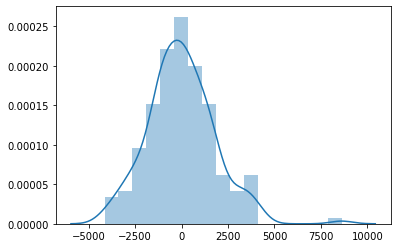

In [79]:
#distribution of residuals
sns.distplot(residuals)
plt.show()

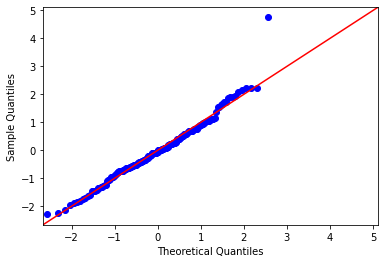

In [80]:
#QQ plot
qqplot(residuals,fit=True, line='45')
plt.show()

In [81]:
#Shapiro-Wilk normality test. 
#The null-hypothesis of this test is that the data was drawn from a normal distribution
snames=['The test statistic', 'p-value']
shapiro=shapiro(residuals)
print(list(zip(snames, shapiro)))

[('The test statistic', 0.9731272459030151), ('p-value', 0.0009106879588216543)]


The normality seems to be held from plots, but the small p-value for the Shapiro-Wilk test shows that we have enough evidence to reject H0, so the normality assumption is not held.